In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Flatten
from keras.utils.np_utils import to_categorical

In [2]:
df = pd.read_csv("../data/A_Z Handwritten Data.csv")

In [4]:
arr = df.iloc[:,1:].to_numpy()
labels = df.iloc[:,:1].to_numpy().reshape(len(df))

data_train, data_test, labels_train, labels_test = train_test_split(arr, labels, test_size=0.20, random_state=42)

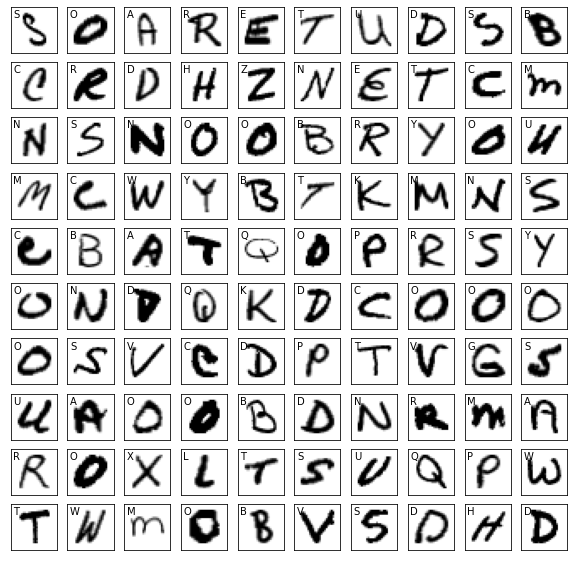

In [5]:
data_train = data_train.reshape(len(labels_train),28,28)
data_test = data_test.reshape(len(labels_test),28,28)

labels_dict = {0:"A", 1:"B",2:"C",3:"D",4:"E",5:"F",6:"G",7:"H",8:"I",9:"J",10:"K",
               11:"L",12:"M",13:"N",14:"O",15:"P",16:"Q",17:"R",18:"S", 19:"T",20:"U",
               21:"V",22:"W",23:"X",24:"Y",25:"Z"}

fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for row in ax:
  for col in row:
    i = np.random.randint(data_train.shape[0])
    col.imshow(data_train[i], cmap='gray_r')
    col.text(1,6,labels_dict[labels_train[i]],fontsize=10)
    col.set_xticks(())
    col.set_yticks(())

plt.show()

In [6]:
x_train = data_train.reshape(data_train.shape[0], data_train.shape[1], data_train.shape[2], 1)
x_test = data_test.reshape(data_test.shape[0], data_test.shape[1], data_test.shape[2], 1)

categorical_train = to_categorical(labels_train, num_classes = 26, dtype = 'int')
categorical_test = to_categorical(labels_test, num_classes = 26, dtype = 'int')

In [7]:
data_train = data_train/255
data_test = data_test/255

model=Sequential()

model.add(Conv2D(filters=32, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(26,activation="softmax"))
    
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
model.fit(data_train, labels_train, epochs=10)

Epoch 1/10
9312/9312 [==============================] - 612s 66ms/step - loss: 0.0978 - accuracy: 0.9725
Epoch 2/10
9312/9312 [==============================] - 595s 64ms/step - loss: 0.0481 - accuracy: 0.9865
Epoch 3/10
9312/9312 [==============================] - 596s 64ms/step - loss: 0.0343 - accuracy: 0.9903
Epoch 4/10
9312/9312 [==============================] - 593s 64ms/step - loss: 0.0277 - accuracy: 0.9918
Epoch 5/10
9312/9312 [==============================] - 592s 64ms/step - loss: 0.0218 - accuracy: 0.9935
Epoch 6/10
9312/9312 [==============================] - 596s 64ms/step - loss: 0.0185 - accuracy: 0.9943
Epoch 7/10
9312/9312 [==============================] - 614s 66ms/step - loss: 0.0157 - accuracy: 0.9952
Epoch 8/10
9312/9312 [==============================] - 604s 65ms/step - loss: 0.0135 - accuracy: 0.9959
Epoch 9/10
9312/9312 [==============================] - 600s 64ms/step - loss: 0.0123 - accuracy: 0.9964
Epoch 10/10
9312/9312 [==============================] 

In [9]:
test_loss, test_acc = model.evaluate(data_test, labels_test, verbose = 1)

2328/2328 [==============================] - 34s 14ms/step - loss: 0.0277 - accuracy: 0.9948


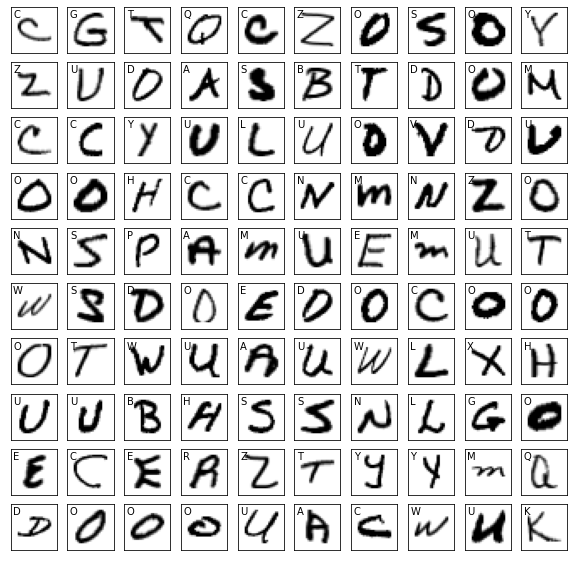

In [10]:
predictions = model.predict(data_test)

fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for row in ax:
  for col in row:
    i = np.random.randint(labels_test.shape[0])
    col.imshow(data_test[i], cmap='gray_r')
    col.text(1,6,labels_dict[np.argmax(predictions[i])],fontsize=10)
    col.set_xticks(())
    col.set_yticks(())

plt.show()

In [11]:
model.save('model.h5')